# Load dữ liệu

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_data = pickle.load(open('/content/drive/MyDrive/NLP/data/X_data.pkl', 'rb'))
y_data = pickle.load(open('/content/drive/MyDrive/NLP/data/y_data.pkl', 'rb'))
X_test = pickle.load(open('/content/drive/MyDrive/NLP/data/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/NLP/data/y_test.pkl', 'rb'))

In [ ]:
# word level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(X_data)

X_data_tfidf =  tfidf_vect.transform(X_data)
X_test_tfidf =  tfidf_vect.transform(X_test)

In [ ]:
pickle.dump(tfidf_vect, open('/content/drive/MyDrive/NLP/data/tfidf_vect.pkl', 'wb'))

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_data_tfidf)

X_data_tfidf_svd = svd.transform(X_data_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
y_data_n = encoder.fit_transform(y_data)
y_test_n = encoder.fit_transform(y_test)

encoder.classes_

array(['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh',
       'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa',
       'Vi tinh'], dtype='<U16')

In [ ]:
X_data[2]

'vườn dưới giếng trời vườn giếng trời là khoảng không_gian chuyển_tiếp đưa ánh_sáng và gió vào nhà thiết_kế vườn giếng thành_công là tạo được mảng thiên_nhiên trong nhà bạn cũng cần chú đến việc trang_trí chọn cây và vật_liệu cho phù_hợp tùy theo từng căn nhà sân giếng trời có_thể là hình chữ_nhật vuông hoặc tam_giác thành của vườn đôi_khi cao hơn nền nhưng không nên quá cao vì sẽ mất tự_nhiên và không hài_hòa với các khu_vực xung_quanh việc thoát nước cần phải chú ngay từ thiết_kế ban_đầu nếu lỡ trồng quá nhiều cây thì nên dứt_khoát bỏ bớt chỉ cần trải sỏi thêm một chậu cây bạn vẫn có một khu vườn đẹp thích_hợp với nhà hẹp thông_thường có ba cách trồng cây trong giếng trời thứ nhất_là trồng thẳng cây xuống đất khi làm nhà bạn nên chú khu_vực vách tường và nền nhà nơi bố_trí vườn đó phải là nơi có chất_liệu màu_sắc kết_hợp với cây tạo nên một góc thiên_nhiên nên chọn loại cây có khả_năng sống trong nhà lâu như trầu bà vạn_niên_thanh cách trồng này đòi_hỏi phải có thời_gian chăm_sóc thô

# Huấn luyện mô hình

---



In [ ]:
import matplotlib.pyplot as plt
from sklearn import naive_bayes, metrics
from sklearn.model_selection import train_test_split

def train_model(classifier, X_data, y_data, X_test, y_test):
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

    classifier.fit(X_train, y_train)

    train_predictions = classifier.predict(X_train)
    val_predictions = classifier.predict(X_val)
    test_predictions = classifier.predict(X_test)

    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))

    print(metrics.classification_report(test_predictions, y_test))

    # Vẽ Confusion Matrix
    disp = metrics.ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=encoder.classes_,
        cmap=plt.cm.Blues,
        normalize = None,
    )
    plt.xticks(rotation=75)
    plt.show()

    return classifier

# Kết quả mô hình Naive Bayes Multinomial


---



Validation accuracy:  0.8561299852289512
Test accuracy:  0.8628431898040617
                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.95      0.65      0.77     10986
        Doi song       0.70      0.69      0.70      2081
        Khoa hoc       0.39      0.97      0.55       838
      Kinh doanh       0.70      0.96      0.81      3847
       Phap luat       0.89      0.88      0.88      3842
        Suc khoe       0.93      0.89      0.91      5686
        The gioi       0.86      0.96      0.91      6038
        The thao       0.97      0.98      0.97      6614
         Van hoa       0.92      0.92      0.92      6292
         Vi tinh       0.86      0.95      0.90      4149

        accuracy                           0.86     50373
       macro avg       0.82      0.88      0.83     50373
    weighted avg       0.89      0.86      0.86     50373



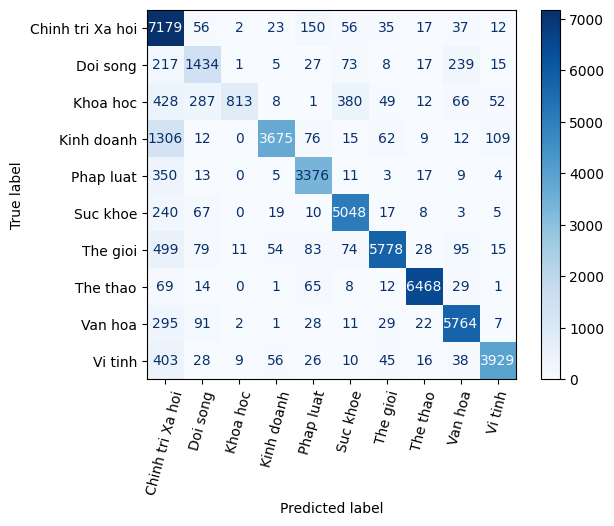

In [ ]:
model = train_model(naive_bayes.MultinomialNB(), X_data_tfidf, y_data, X_test_tfidf, y_test)

# Kết quả mô hình Naive Bayes Bernoulli

---



*   Mục danh sách
*   Mục danh sách



Validation accuracy:  0.831314623338257
Test accuracy:  0.852063605502948
                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.77      0.78      0.78      7443
        Doi song       0.70      0.62      0.66      2287
        Khoa hoc       0.67      0.78      0.72      1821
      Kinh doanh       0.87      0.83      0.85      5547
       Phap luat       0.92      0.74      0.82      4724
        Suc khoe       0.89      0.92      0.90      5263
        The gioi       0.91      0.90      0.91      6812
        The thao       0.89      0.99      0.94      5946
         Van hoa       0.85      0.89      0.87      5963
         Vi tinh       0.88      0.88      0.88      4567

        accuracy                           0.85     50373
       macro avg       0.84      0.83      0.83     50373
    weighted avg       0.85      0.85      0.85     50373



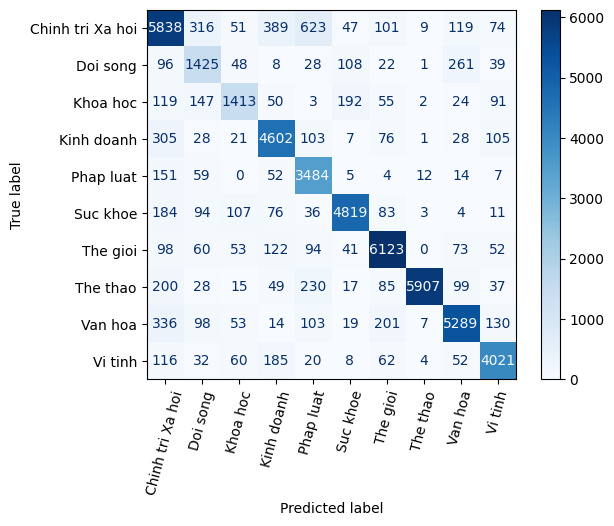

BernoulliNB()

In [ ]:
train_model(naive_bayes.BernoulliNB(), X_data_tfidf, y_data, X_test_tfidf, y_test)

# Kết quả mô hình Naive Bayes Bernoulli sau khi đã giảm chiều dữ liệu xuống 300


---



Validation accuracy:  0.7955686853766617
Test accuracy:  0.8113076449685347
                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.80      0.71      0.75      8595
        Doi song       0.58      0.41      0.48      2902
        Khoa hoc       0.68      0.72      0.70      1971
      Kinh doanh       0.83      0.82      0.82      5318
       Phap luat       0.78      0.81      0.79      3671
        Suc khoe       0.79      0.91      0.85      4681
        The gioi       0.83      0.89      0.86      6266
        The thao       0.92      0.89      0.90      6874
         Van hoa       0.81      0.85      0.83      5918
         Vi tinh       0.85      0.93      0.89      4177

        accuracy                           0.81     50373
       macro avg       0.79      0.79      0.79     50373
    weighted avg       0.81      0.81      0.81     50373



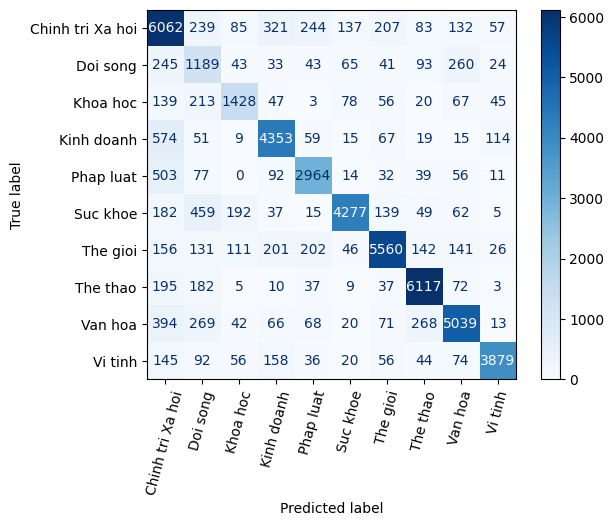

BernoulliNB()

In [ ]:
train_model(naive_bayes.BernoulliNB(), X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test)

# Test

In [ ]:
!pip install pyvi
from pyvi import ViTokenizer, ViPosTagger # thư viện NLP tiếng Việt
import gensim # thư viện NLP
# Kiểm thử
def preprocessing_doc(doc):
    lines = gensim.utils.simple_preprocess(doc)
    lines = ' '.join(lines)
    lines = ViTokenizer.tokenize(lines)
    features = tfidf_vect.transform([lines])
    print(lines)

    return features

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00


In [ ]:
test_doc='''Chiến sự Gaza buộc Mỹ điều thêm các tổ hợp Patriot đến Trung Đông, nguy cơ tạo ra lỗ hổng phòng không tại những khu vực quan trọng khác.

Lầu Năm Góc dự kiến trưng bày một hệ thống phòng không tầm xa Patriot tại triển lãm hàng không Dubai diễn ra trong tuần này, nhằm phô diễn sức mạnh quân sự của Mỹ tại một trong những hội chợ vũ khí lớn nhất thế giới.

Tuy nhiên, xung đột Israel - Hamas bùng phát khiến tổ hợp phòng không trị giá một tỷ USD này trở nên cần thiết để bảo vệ binh sĩ Mỹ đồn trú ở Trung Đông trước các cuộc tấn công của những nhóm dân quân thân Iran, buộc Lầu Năm Góc hủy kế hoạch trưng bày Patriot ở Dubai.

Các lãnh đạo lục quân Mỹ từ lâu đã cảnh báo rằng họ không có đủ số lượng Patriot để đối phó những thách thức với an ninh quốc gia, bao gồm cạnh tranh chiến lược với Trung Quốc và xung đột tại Ukraine, Trung Đông.

Một số nhà lập pháp Mỹ cũng bày tỏ lo ngại về tình trạng này. Chủ tịch Tiểu ban Phòng thủ Tên lửa thuộc Ủy ban Quân vụ Hạ viện Mỹ Doug Lamborn cho rằng đợt tăng cường các hệ thống Patriot đến Trung Đông là phù hợp để đối phó với mối đe dọa trong khu vực, nhưng cũng kêu gọi giới chức Mỹ thông qua ngân sách để mua thêm tên lửa.'''

In [ ]:
features = preprocessing_doc(test_doc)
model.predict(features)

chiến_sự gaza buộc mỹ điều thêm các tổ_hợp patriot đến trung đông nguy_cơ tạo ra lỗ_hổng phòng không tại những khu_vực quan_trọng khác lầu năm góc dự_kiến trưng_bày một hệ_thống phòng không tầm xa patriot tại triển_lãm hàng không dubai diễn ra trong tuần này nhằm phô_diễn sức_mạnh quân_sự của mỹ tại một trong những hội_chợ vũ_khí lớn nhất thế_giới tuy_nhiên xung_đột israel hamas bùng_phát khiến tổ_hợp phòng không trị_giá một tỷ usd này trở_nên cần_thiết để bảo_vệ_binh_sĩ mỹ đồn trú trung đông trước các cuộc tấn_công của những nhóm dân_quân thân iran buộc lầu năm góc_hủy kế_hoạch trưng_bày patriot dubai các lãnh_đạo lục_quân mỹ từ lâu đã cảnh_báo rằng họ không có đủ số_lượng patriot để đối_phó những thách_thức với an_ninh quốc_gia bao_gồm cạnh_tranh chiến_lược với trung_quốc và xung_đột tại ukraine trung đông một_số nhà lập_pháp mỹ cũng bày_tỏ lo_ngại về tình_trạng này chủ_tịch tiểu_ban phòng_thủ tên_lửa thuộc ủy_ban quân vụ hạ_viện mỹ doug lamborn cho rằng đợt tăng_cường các hệ_thống p

array(['The gioi'], dtype='<U16')

In [ ]:
test_doc_1 = '''Sau hai năm thực hiện Quyết định số 06/QĐ-TTg ngày 6/1/2022 của Thủ tướng Chính phủ phê duyệt Đề án phát triển ứng dụng dữ liệu dân cư, định danh và xác thực điện tử phục vụ chuyển đổi số quốc gia giai đoạn 2022-2025, tầm nhìn đến năm 2030 (Đề án 06), ngành bảo hiểm xã hội Việt Nam đã đạt được nhiều kết quả quan trọng.

Hiệu quả từ việc thực hiện Đề án 06

Trong hai năm 2022 và 2023, thực hiện Đề án 06, Bảo hiểm xã hội Việt Nam được giao thực hiện 32 nhiệm vụ, trong đó đã hoàn thành là 24 nhiệm vụ và 8 nhiệm vụ thực hiện thường xuyên và đang thực hiện trong hạn. Bảo hiểm xã hội Việt Nam là một trong số đơn vị đầu tiên đã kết nối thành công với cơ sở dữ liệu quốc gia về dân cư ngay khi được đưa vào vận hành chính thức; trong đó, đạt nhiều kết quả nổi bật, như:

Kết nối, chia sẻ dữ liệu giữa Cơ sở dữ liệu quốc gia về dân cư với cơ sở dữ liệu quốc gia về bảo hiểm; triển khai kỹ thuật bảo đảm từng bước sử dụng thẻ căn cước công dân, ứng dụng định danh điện tử quốc gia (VNeID) thay thế thẻ bảo hiểm y tế giấy để khám bệnh, chữa bệnh bảo hiểm y tế.

Đến nay, hệ thống của Bảo hiểm xã hội Việt Nam đã xác thực hơn 95 triệu thông tin nhân khẩu trong cơ sở dữ liệu do Bảo hiểm xã hội Việt Nam quản lý, trong đó có khoảng 86,6 triệu người đang tham gia, thụ hưởng bảo hiểm xã hội, bảo hiểm y tế, bảo hiểm thất nghiệp chiếm 97% tổng số người tham gia (không bao gồm lực lượng vũ trang, thân nhân quân đội) với cơ sở dữ liệu quốc gia về dân cư.

Ngành bảo hiểm xã hội Việt Nam cũng phối hợp chặt chẽ với ngành công an, ngành y tế trong triển khai sử dụng thẻ căn cước công dân và VNeID phục vụ người dân đi khám, chữa bệnh bảo hiểm y tế; ứng dụng công nghệ sinh trắc tại cơ sở khám, chữa bệnh và cơ quan bảo hiểm xã hội các cấp; liên thông dữ liệu khám sức khỏe lái xe, giấy chứng sinh, giấy báo tử từ cơ sở khám, chữa bệnh, sổ sức khỏe điện tử; đồng bộ, chia sẻ thông tin giúp Bộ Giáo dục và Đào tạo theo dõi, đánh giá tình hình việc làm của sinh viên sau khi ra trường.

Hiện tất cả các cơ sở khám, chữa bệnh bảo hiểm y tế trên toàn quốc đã triển khai khám, chữa bệnh bảo hiểm y tế bằng căn cước công dân gắn chip, với hơn 55 triệu lượt tra cứu thông tin, đem lại nhiều lợi ích thiết thực giúp đơn giản hóa thủ tục, tiết kiệm thời gian cho cả người bệnh và cán bộ y tế, cơ quan bảo hiểm xã hội cũng tiết kiệm được chi phí in ấn và phát hành thẻ bảo hiểm y tế.

Bảo hiểm xã hội Việt Nam cũng hoàn thành cung cấp dịch vụ công trực tuyến theo Quyết định số 422/QĐ-TTg ngày 4/4/2022 của Thủ tướng Chính phủ lên Cổng Dịch vụ công quốc gia, gồm: “Đăng ký tham gia đóng bảo hiểm xã hội tự nguyện”; “Đăng ký đóng, cấp thẻ bảo hiểm y tế đối với người chỉ tham gia bảo hiểm y tế”; “Giải quyết hưởng bảo hiểm xã hội một lần” (thuộc nhóm áp dụng thí điểm xác thực chữ ký số được tích hợp trong ứng dụng trên thiết bị di động để phục vụ cung cấp dịch vụ công trực tuyến), nhằm đơn giản hóa thành phần hồ sơ, cắt giảm thời gian, chi phí, tạo thuận lợi phục vụ người dân, doanh nghiệp khi giao dịch với cơ quan bảo hiểm xã hội.

Bên cạnh đó, ngành bảo hiểm xã hội tiếp tục nâng cấp, triển khai hiệu quả ứng dụng VssID - Bảo hiểm xã hội số; đồng thời triển khai kết nối, tích hợp tài khoản định danh điện tử (VNeID) trên ứng dụng VssID của Bảo hiểm xã hội Việt Nam, hướng tới cho phép hơn 50 triệu người dân đang có tài khoản VNeID có thể truy cập, sử dụng ứng dụng VssID.

Theo bảng xếp hạng hiện nay về “Ứng dụng được tải nhiều nhất tại Việt Nam” trên App Store, ứng dụng VssID của Bảo hiểm xã hội Việt Nam đứng thứ nhất trong nhóm ứng dụng về kinh doanh và đứng thứ 25 trong nhóm các ứng dụng cung cấp miễn phí. Đây cũng là một trong ba ứng dụng của cơ quan nhà nước có lượng người dùng lớn tại Việt Nam, cùng với hai ứng dụng khác là: VNeID của Bộ Công an, Thanh niên Việt Nam của Trung ương Đoàn…

Chuyển đổi số mạnh mẽ

Với quan điểm xuyên suốt “Lấy người dân, doanh nghiệp làm chủ thể, trung tâm phục vụ”, tất cả các kết quả, nhiệm vụ của ngành bảo hiểm xã hội Việt Nam đều nhằm mang tới những lợi ích tối ưu, tốt hơn cho người tham gia, thụ hưởng các chính sách bảo hiểm xã hội, bảo hiểm y tế, bảo hiểm thất nghiệp. Công tác chuyển đổi số của ngành đã được thực hiện mạnh mẽ, toàn diện, tạo chuyển biến mạnh mẽ từ nhận thức của người đứng đầu đến từng cán bộ; thấy được tầm quan trọng của công tác ứng dụng công nghệ thông tin, chuyển đổi số với hoạt động của ngành.

Với những dấu ấn đạt được trong công tác chuyển đổi số, để phát huy kết quả trong thời gian tới, Tổng Giám đốc Bảo hiểm xã hội Việt Nam Nguyễn Thế Mạnh cho biết: Ngành sẽ tiếp tục triển khai các giải pháp trọng tâm để thực hiện Chiến lược phát triển Chính phủ điện tử hướng tới Chính phủ số giai đoạn 2021-2025, định hướng đến năm 2030 theo Quyết định số 942/QĐ-TTg đã được Thủ tướng Chính phủ phê duyệt và ban hành ngày 15/6/2021 và Đề án 06.

Bảo hiểm xã hội Việt Nam đã và đang phối hợp các bộ, ngành, chuyên gia trong nước và quốc tế để xây dựng đề án tổng thể về chuyển đổi số của ngành. Ở giai đoạn tiếp theo từ năm 2023 đến 2025 và định hướng đến năm 2030, Bảo hiểm xã hội Việt Nam quyết tâm thực hiện chuyển đổi số mạnh mẽ và toàn diện, lấy người tham gia, thụ hưởng chế độ, chính sách bảo hiểm xã hội, bảo hiểm y tế làm trung tâm.

Trong đó, ngành tập trung củng cố, phát huy thế mạnh của cơ sở dữ liệu sẵn có luôn được làm giàu; tích cực phối hợp các bộ, ngành, địa phương xác thực, chia sẻ, liên thông dữ liệu phục vụ công tác quản lý và cung cấp dịch vụ công trực tuyến; phát triển ngành bảo hiểm xã hội Việt Nam số với nguồn nhân lực số chất lượng cao; đưa vào thử nghiệm và áp dụng các công nghệ mới như Blockchain, Big Data, AI để mang lại hiệu quả trong quản lý, nâng cao trải nghiệm của tổ chức, cá nhân...

Ngành hy vọng sẽ tiếp tục tạo ra ngày càng nhiều tiện ích, dịch vụ mang lại lợi ích thiết thực cho người dân, doanh nghiệp với mục tiêu xác định “chuyển đổi số là nhiệm vụ quan trọng, then chốt để ngành phục vụ tốt nhất người tham gia, thụ hưởng chính sách”.'''

In [ ]:
model.predict(preprocessing_doc(test_doc_1))

sau hai năm thực_hiện quyết_định số qđ ttg ngày của thủ_tướng chính_phủ_phê_duyệt đề_án phát_triển ứng_dụng dữ_liệu dân_cư định_danh và xác_thực điện_tử phục_vụ chuyển_đổi số quốc_gia giai_đoạn tầm nhìn đến năm đề_án ngành bảo_hiểm xã_hội việt_nam đã đạt được nhiều kết_quả quan_trọng hiệu_quả từ việc thực_hiện đề_án trong hai năm và thực_hiện đề_án bảo_hiểm xã_hội việt nam được giao thực_hiện nhiệm_vụ trong đó đã hoàn_thành là nhiệm_vụ và nhiệm_vụ thực_hiện thường_xuyên và đang thực_hiện trong hạn bảo_hiểm xã_hội việt nam là một trong số đơn_vị đầu_tiên đã kết_nối thành_công với cơ_sở dữ_liệu quốc_gia về dân_cư ngay khi được đưa vào vận_hành chính_thức trong đó đạt nhiều kết_quả nổi_bật như kết_nối chia_sẻ dữ_liệu giữa cơ_sở dữ_liệu quốc_gia về dân_cư với cơ_sở dữ_liệu quốc_gia về bảo_hiểm triển_khai kỹ_thuật bảo_đảm từng bước sử_dụng thẻ căn_cước công_dân ứng_dụng định_danh điện_tử quốc_gia vneid thay_thế thẻ bảo_hiểm_tế giấy để khám bệnh chữa bệnh bảo_hiểm_tế đến nay hệ_thống của bảo

array(['Chinh tri Xa hoi'], dtype='<U16')

In [ ]:
test_doc_2 = '''VinFast sản xuất xe điện và pin tại Ấn Độ
NDO - Ngày 6/1, VinFast và Chính phủ Bang Tamil Nadu, Ấn Độ chính thức công bố hợp tác trong Bản ghi nhớ đầu tư (MoU) nhằm phát triển giao thông xanh tại Ấn Độ.
Thứ bảy, ngày 06/01/2024 - 12:44






0:00
/
0:00
0:00

Nam miền Bắc

VinFast sản xuất xe điện và pin tại Ấn Độ
Theo đó, VinFast và Chính phủ Bang sẽ tích cực làm việc hướng tới mục tiêu đầu tư lên đến 2 tỷ USD. Trong đó, mức đầu tư 500 triệu USD cho giai đoạn 1 sẽ được triển khai trong thời gian 5 năm. Sự kiện ghi dấu bước ngoặt quan trọng của VinFast trong chiến lược thâm nhập vào thị trường ô-tô lớn thứ 3 thế giới.

Kế hoạch mở rộng sang Ấn Độ được thực hiện nhằm nắm bắt cơ hội phát triển tại thị trường đông dân nhất và có ngành xe điện tăng trưởng nhanh nhất thế giới. Đây là một phần trong kế hoạch thiết lập sự hiện diện mạnh mẽ của VinFast tại các thị trường trọng điểm, cũng như hoàn thiện chuỗi cung ứng xe điện cho chiến lược phát triển toàn cầu.

Dự án xây dựng cơ sở sản xuất xe điện và pin của VinFast tại Tamil Nadu dự kiến sẽ tạo ra khoảng 3.000 - 3.500 cơ hội việc làm tại thị trường địa phương. Không chỉ góp phần nâng cao trình độ lao động, VinFast còn cam kết thúc đẩy bình đẳng giới, mang đến cơ hội phát triển nghề nghiệp cho người dân địa phương.

Tọa lạc tại thành phố cảng Thoothukudi, dự án đặt mục tiêu phát triển thành trung tâm sản xuất xe điện hiện đại, tầm cỡ trong khu vực với quy mô sản xuất lên đến 150.000 xe điện/năm. Dự kiến được khởi công ngay trong năm 2024, dự án tạo tiền đề vững chắc cho mục tiêu tăng trưởng kinh tế tại Tamil Nadu nói riêng và toàn bộ Ấn Độ nói chung.

Bên cạnh đó, dự án sẽ góp phần thúc đẩy phát triển giao thông xanh, hướng đến mục tiêu 30% ô tô cá nhân là xe điện – mục tiêu quan trọng của Chính phủ Bang nhằm giảm thiểu phát thải carbon trong lĩnh vực giao thông.

Bà Trần Mai Hoa, Phó Tổng Giám đốc Kinh doanh và Marketing VinFast toàn cầu chia sẻ: “Bản ghi nhớ hợp tác này là cam kết mạnh của VinFast với sự phát triển bền vững và tầm nhìn về một tương lai giao thông không phát thải. Chúng tôi tin rằng việc đầu tư vào Tamil Nadu không chỉ mang lại lợi ích kinh tế đáng kể cho cả hai bên mà còn giúp thúc đẩy sự chuyển đổi năng lượng xanh tại Ấn Độ và trong khu vực”.

Ông Thallikotai Raju Balu Rajaa, Bộ trưởng Công nghiệp, Chính phủ Tamil Nadu, cho biết: “Các doanh nghiệp sản xuất xe điện không chỉ là những động lực kinh tế quan trọng mà còn đóng góp vào tầm nhìn xanh của Bang. Chúng tôi rất vui mừng vì VinFast đã lựa chọn đầu tư vào Tamil Nadu để thiết lập cơ sở sản xuất xe điện và pin của hãng. Sở hữu tiềm lực vững chắc và cam kết mạnh mẽ với tương lai xanh, tôi tin rằng VinFast sẽ là một đối tác kinh tế đang tin cậy, đóng góp vào tương lai phát triển bền vững của Tamil Nadu”.

Dự án nhằm phát triển giao thông xanh của VinFast là dự án xây dựng cơ sở sản xuất thứ 3 của doanh nghiệp, đồng thời cũng là mức đầu tư lớn nhất trong lịch sử của Tamil Nadu. Ghi nhận những đóng góp to lớn cho thị trường lao động, sự tăng trưởng kinh tế và tầm nhìn xanh của Bang, Chính phủ Tamil Nadu cũng cam kết hỗ trợ tối đa cho VinFast trên phương diện đất sản xuất, nguồn cung năng lượng và cơ sở hạ tầng sản xuất. Bên cạnh đó, hai bên sẽ tiếp tục làm việc để xem xét các cơ hội trong việc phát triển hạ tầng trạm sạc để cùng nhau thúc đẩy giao thông xanh tại địa phương.

Quyết định đầu tư vào Tamil Nadu không chỉ mở ra những lợi ích kinh tế cho VinFast và thị trường địa phương, mà còn thắt chặt hơn nữa mối quan hệ Hợp tác Chiến lược Toàn diện giữa hai nước Việt Nam - Ấn Độ.

Bên cạnh việc xây dựng cơ sở sản xuất tại Tamil Nadu, VinFast cũng đặt mục tiêu thiết lập mạng lưới đại lý phân phối và bán lẻ trên toàn quốc nhằm xây dựng kết nối sâu rộng và nhanh chóng tiếp cận khách hàng Ấn Độ.

VinFast là nhà sản xuất xe điện tiên phong tại Việt Nam với mục tiêu trở thành một trong những thương hiệu xe điện hàng đầu thế giới. Thông qua nỗ lực nghiên cứu, đổi mới không ngừng, VinFast khẳng định mục tiêu trở thành một doanh nghiệp xe điện quy mô toàn cầu cùng cam kết xây dựng một tương lai xanh cho mọi người.'''

In [ ]:
model.predict(preprocessing_doc(test_doc_2))

vinfast sản_xuất xe điện và pin tại ấn độ ndo ngày vinfast và chính_phủ bang tamil nadu ấn độ chính_thức công_bố hợp_tác trong bản ghi_nhớ đầu_tư mou nhằm phát_triển giao_thông xanh tại ấn độ thứ bảy ngày nam miền bắc vinfast sản_xuất xe điện và pin tại ấn độ theo đó vinfast và chính_phủ bang sẽ tích_cực làm_việc hướng tới mục_tiêu đầu_tư lên đến tỷ usd trong đó mức đầu_tư triệu usd cho giai_đoạn sẽ được triển_khai trong thời_gian năm sự_kiện ghi dấu bước_ngoặt quan_trọng của vinfast trong chiến_lược thâm_nhập vào thị_trường tô lớn thứ thế_giới kế_hoạch mở_rộng sang ấn độ được thực_hiện nhằm nắm_bắt cơ_hội phát_triển tại thị_trường đông dân nhất và có ngành xe điện tăng_trưởng nhanh nhất thế_giới đây là một phần trong kế_hoạch thiết_lập sự hiện_diện mạnh_mẽ của vinfast tại các thị_trường trọng_điểm cũng như hoàn_thiện chuỗi cung_ứng xe điện cho chiến_lược phát_triển toàn_cầu dự_án xây_dựng cơ_sở sản_xuất xe điện và pin của vinfast tại tamil nadu dự_kiến sẽ tạo ra khoảng cơ_hội việc_làm

array(['Chinh tri Xa hoi'], dtype='<U16')